In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler



In [2]:
# Importamos dataset
bmw = pd.read_csv("bmw_pricing_v3.csv")

**ANÁLISIS**

ANÁLISIS GENERAL

In [4]:
bmw.head ()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [5]:
bmw.info ()
# Tenemos booleanas, floats y objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [7]:
bmw.size

87174

In [8]:
bmw.shape

(4843, 18)

In [9]:
len(bmw)

4843

ANÁLISIS NULOS

In [10]:
bmw.isnull().sum()
# Tenemos nulos en casi todas las columnas, salvo la columna gps

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [47]:
bmw["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

In [ ]:
# Los nulos en:
# - Marca: no tenemos claro que sean de la marca BMW, se podrían cambiar a "Sin Marca"
# - Modelo: hay 3 nulos en Modelo, que se podrían cambiar a "Sin Modelo"
# - km:
# - potencia: 
# - fecha_registro: 
# - tipo_gasolina:
# - color: 
# - tipo_coche: 
# - volante_regulable:
# - aire_acondicionado: 
# - camara_trasera: 
# - asientos_traseros_plegables: 
# - elevalunas_electrico: 
# - bluetooth: 
# - alerta_lim_velocidad:
# - precio:
# - fecha_venta:


ANÁLISIS DUPLICADOS

In [17]:
bmw[bmw.duplicated]
# No hay duplicados

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


ANÁLISIS COLUMNA A COLUMNA - OUTLIERS

In [18]:
bmw["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [21]:
bmw["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

In [22]:
bmw["km"].value_counts()

km
123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: count, Length: 4784, dtype: int64

<Axes: >

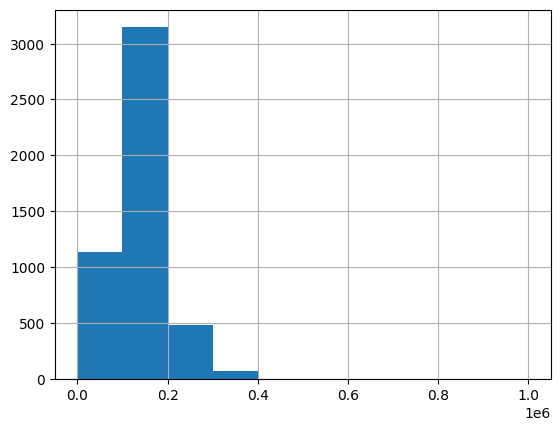

In [23]:
bmw["km"].hist()

In [24]:
bmw["potencia"].value_counts()

potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64

<Axes: >

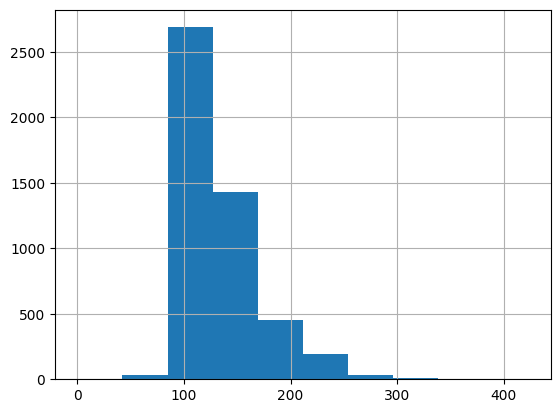

In [25]:
bmw["potencia"].hist()

In [29]:
bmw.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [30]:
bmw["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

<Axes: >

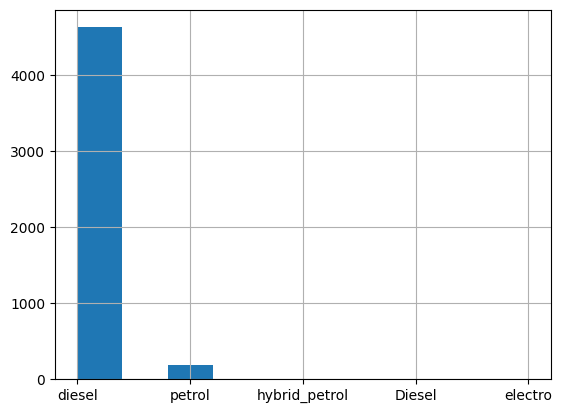

In [31]:
bmw["tipo_gasolina"].hist()

In [32]:
bmw["color"].value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

<Axes: >

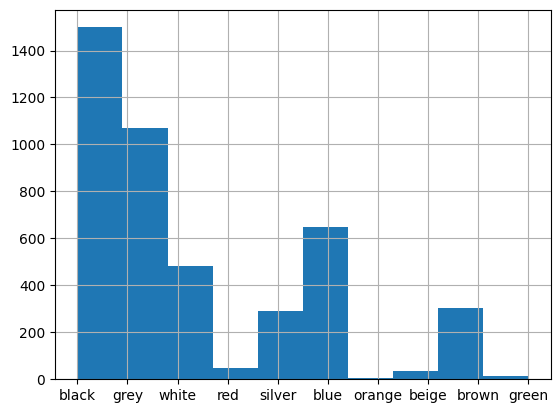

In [33]:
bmw["color"].hist()

In [34]:
bmw["tipo_coche"].value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [35]:
bmw["volante_regulable"].value_counts()

volante_regulable
True     2662
False    2177
Name: count, dtype: int64

In [36]:
bmw["aire_acondicionado"].value_counts()

aire_acondicionado
True     3465
False     892
Name: count, dtype: int64

In [37]:
bmw["camara_trasera"].value_counts()

camara_trasera
False    3864
True      977
Name: count, dtype: int64

In [38]:
bmw["asientos_traseros_plegables"].value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

In [39]:
bmw["elevalunas_electrico"].value_counts()

elevalunas_electrico
False    2612
True     2229
Name: count, dtype: int64

In [40]:
bmw["bluetooth"].value_counts()

bluetooth
False    3119
True      996
Name: count, dtype: int64

In [41]:
bmw["gps"].value_counts()

gps
True     4514
False     329
Name: count, dtype: int64

In [43]:
bmw["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2240
False    1875
Name: count, dtype: int64

In [44]:
bmw["precio"].value_counts()

precio
13100.0    68
14900.0    65
11900.0    61
14300.0    60
13400.0    57
           ..
48200.0     1
41900.0     1
38800.0     1
28400.0     1
45100.0     1
Name: count, Length: 437, dtype: int64

<Axes: >

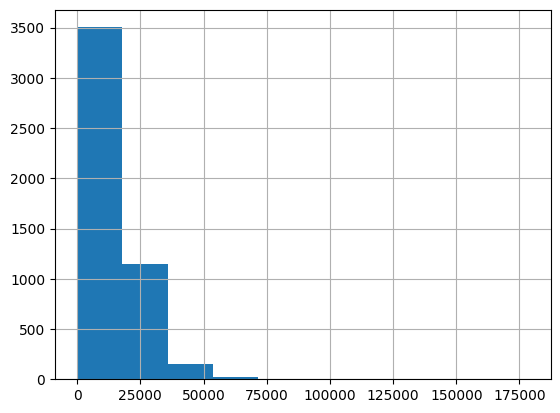

In [45]:
bmw["precio"].hist()
# No parece que hayan outliers

**PREPROCESAMIENTO**

CONVERTIR FECHAS A DATETIME

In [11]:
# Hacemos una primera copia del data set
bmw2 = bmw.copy()

In [14]:
# Hacemos un for para cambiar el dtype de las dos columnas fecha_registro y fecha_venta
for i in ["fecha_registro", "fecha_venta"]:
    bmw2[i] = pd.to_datetime(bmw2[i])

In [15]:
bmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        3873 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               2420 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4398 non-null   object        
 7   tipo_coche                   3383 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4357 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  1452 non-null 

In [28]:
bmw2.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaT,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


DECISION SOBRE NULOS